<a href="https://colab.research.google.com/github/AlexeiPelyushenko/RandomProjects/blob/main/CollatzConjecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 1 - Group 2
## Collatz Conjecture
Tanner Boyea, Laura Daniels, Jesse Lynch, Gavin Moss, Alexei Pelyushenko

##About this exploration:
In this exploration, we will consider a positive integer *n*. We will then apply an algorithm, in order to achieve a repeating sequence of 4 → 2 → 1 → 4.... This is known as The Collatz Conjecture. The Collatz Conjecture has yet to be proven, nor disproven.

The different sections of this exploration include:

* The algorithm
*   A verification that all positive integers up to 1,000,000 follow the conjecture
*   Counting the number of steps to termination
*   What happens when the conjecture is applied to negative integers 





##The Collatz Conjucture algorithm
Start with a positive integer. 

If the integer is odd, we will multiply it by 3, then added by 1. If the integer is even, we will divide it by 2. 

The Collatz Conjecture claims that if we repeat this process, any positive integer will result in a loop of 4 (which we divide by 2 since it's even) → 2 (we once again divide by 2) → 1 (which is odd, so we multiply by 3, then add 1) → 4 → 2 → 1 → 4 → 2 → 1...

##Verifying Collatz Conjecture up to 1,000,000:
In this section we will explore different programming methods in order to verify the Collatz Conjecture holds for every positive integer up to 1 million. We will progressively add strategies so that python can run these tests as efficiently as possible.

In [48]:
#  Importing time to be used to test efficieny of code
from time import time


We know that the numbers 1, 2, and 4 form an infinite cycle.

Therefore, if n is ever 1, 2, or 4, we can stop the loop.

In [49]:
#  Confirming that first 100,000 integers terminate:
time0 = time()

for N in range(1, 100001):
    n = N
    while n not in [1, 2, 4]:
        if n%2 == 0:
            n //= 2
        else:
            n = 3 * n + 1

print("First 100,000 integers successfully terminated in {} seconds.".format(time() - time0))

First 100,000 integers successfully terminated in 2.492238759994507 seconds.


#Improvement #1
 If we know all integers smaller than k terminate, we can stop the loop if n ever becomes smaller than k.

If n is even and we know all k < n terminate, we can conclude n terminates without testing it.

More efficient way of testing first 1,000,000 integers:

In [50]:
#  More efficient way of testing first 1,000,000 integers:
time0 = time()

for N in range(3, 1000001, 2):
    n = N
    while n >= N:
        if n%2:
            n = 3 * n + 1
        else:
            n //= 2
print("First 1,000,000 integers successfully terminated in {} seconds.".format(time() - time0))

First 1,000,000 integers successfully terminated in 1.0011777877807617 seconds.


This improved the speed, but lets see if we can make this easier to work with.

#Improvement #2
We can define a function that replaces a chunk of this code to make future coding easier.

In [51]:
def collatz(n):
  if n%2:
    return 3 * n + 1
  return n // 2

In [52]:
#  More efficient test now using function:
time0 = time()
for N in range(3, 1000001, 2):
    n = N
    while n >= N:
        n = collatz(n)
print("First 1,000,000 integers successfully terminated in {} seconds.".format(time() - time0))

First 1,000,000 integers successfully terminated in 1.3330183029174805 seconds.


This way isn't quite as fast, but still pretty good and much easier to work with.

## Number of steps to terminate
For the sake of both curiousity and analysis, we can count the number of times we must cycle through through the algorithm in order to reach our loop of 4 → 2 → 1.

#Discoveries
After adding a steps counter, we will now test our code on the integers from 1 to 100 by applying both the counter and the collatz function we defined earlier.

In [53]:
#  Number of steps for n to reach 1, 2, or 4 for all positive n up to 100:
for N in range(1, 101):
  n = N
  steps = 0
  while n not in [1, 2, 4]:
    steps += 1
    n = collatz(n)
  print(N, steps)

1 0
2 0
3 5
4 0
5 3
6 6
7 14
8 1
9 17
10 4
11 12
12 7
13 7
14 15
15 15
16 2
17 10
18 18
19 18
20 5
21 5
22 13
23 13
24 8
25 21
26 8
27 109
28 16
29 16
30 16
31 104
32 3
33 24
34 11
35 11
36 19
37 19
38 19
39 32
40 6
41 107
42 6
43 27
44 14
45 14
46 14
47 102
48 9
49 22
50 22
51 22
52 9
53 9
54 110
55 110
56 17
57 30
58 17
59 30
60 17
61 17
62 105
63 105
64 4
65 25
66 25
67 25
68 12
69 12
70 12
71 100
72 20
73 113
74 20
75 12
76 20
77 20
78 33
79 33
80 7
81 20
82 108
83 108
84 7
85 7
86 28
87 28
88 15
89 28
90 15
91 90
92 15
93 15
94 103
95 103
96 10
97 116
98 23
99 23
100 23


Of course, the numbers 1, 2, and 4 take 0 steps.

Past that, we have discovered that:

* Powers of 2 take k steps, where k satisfies $2^k = \frac{n}{4}.$

* The integer that takes the most steps from from 1-100 is 97, taking a total 116 steps to terminate.

In [54]:
#  Finding greatest number of steps for n to reach 1, 2, or 4 for all positive n up to 1,000,000:
max_steps = 0
for N in range(1, 1000001, 2):
  n = N
  steps = 0
  while n not in [1, 2, 4]:
    steps += 1
    n = collatz(n)
  if steps > max_steps:
    print(N, steps)
    max_steps = steps

3 5
7 14
9 17
19 18
25 21
27 109
55 110
73 113
97 116
129 119
171 122
231 125
313 128
327 141
649 142
703 168
871 176
1161 179
2223 180
2463 206
2919 214
3711 235
6171 259
10971 265
13255 273
17647 276
23529 279
26623 305
34239 308
35655 321
52527 337
77031 348
106239 351
142587 372
156159 380
216367 383
230631 440
410011 446
511935 467
626331 506
837799 522


After programming a cell to count the steps of each integer from 1-1,000,000, we discover that:

* The number that takes the most steps for all n up to 1,000,000 is $837799$, with a total of $522$ steps.

In [55]:
#  Number of steps for n to become smaller than it was initially for all positive n up to 100:
#  Skipping even numbers because number of steps will always be 1.
for N in range(3, 101, 2):
  n = N
  steps = 0
  while n >= N:
    steps += 1
    n = collatz(n)
  print(N, steps)

3 6
5 3
7 11
9 3
11 8
13 3
15 11
17 3
19 6
21 3
23 8
25 3
27 96
29 3
31 91
33 3
35 6
37 3
39 13
41 3
43 8
45 3
47 88
49 3
51 6
53 3
55 8
57 3
59 11
61 3
63 88
65 3
67 6
69 3
71 83
73 3
75 8
77 3
79 13
81 3
83 6
85 3
87 8
89 3
91 73
93 3
95 13
97 3
99 6


#Additional Discoveries
Some other patterns we recognize is that:

* Every number thats 1 more than a multiple for 4 takes 3 steps. In other words, every n that is 1*mod*4 has a dropping time of 3.

* 11 takes 8 steps to get smaller. 12 more than that also takes 8 steps. 20 more than that also takes 8 steps. 12 more than that also takes 8 steps. This +12, +20 pattern seems to continue indefinitely. In other words, every n that is 11*mod*32 or 23*mod*32 has a dropping time of 8.



In [56]:
#  Finding greatest number of steps for n to reach get smaller for all positive n up to 1,000,000:
max_steps = 0
for N in range(2, 1000001):
  n = N
  steps = 0
  while n >= N:
    steps += 1
    n = collatz(n)
  if steps > max_steps:
    print(N, steps)
    max_steps = steps

2 1
3 6
7 11
27 96
703 132
10087 171
35655 220
270271 267
362343 269
381727 282
626331 287


The number that takes the most steps for all n up to 1,000,000 is $626331$, with $287$ steps.

Notably, every n with a relatively maximal dropping time after n = 27 is one less than a multiple of 8. So, we should further explore the properties of numbers in the modulo class 8.

In [57]:
import matplotlib.pyplot as plt

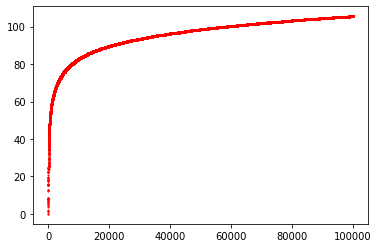

In [58]:
#  Average steps to reach 1, 2, 4 loop graphed:
x_values, y_values = [], []
average = 0
for N in range(1, 100001):
    x_values.append(N)
    steps = 0
    n = N
    while n not in [1, 2, 4]:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N
    y_values.append(average)

plt.scatter(x_values, y_values, s=1, c='red')
plt.show()

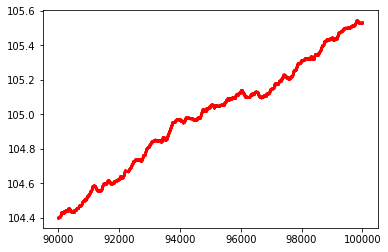

In [59]:
#  A zoom into the right side of the previous graph:
x_values, y_values = [], []
average = 0
for N in range(1, 100001):
    x_values.append(N)
    steps = 0
    n = N
    while n not in [1, 2, 4]:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N
    y_values.append(average)

plt.scatter(x_values[-10000:], y_values[-10000:], s=1, c='red')
plt.show()

This shows a slow but definite increase.

We can conjecture that the average tends to infinity.

5.209110000000036


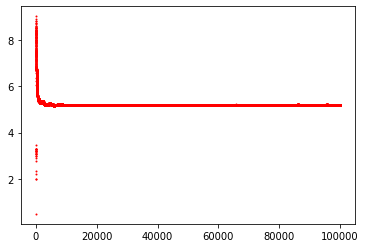

In [60]:
#  Average steps to get smaller graphed:
x_values, y_values = [], []
average = 0
for N in range(2, 100001):
    x_values.append(N)
    steps = 0
    n = N
    while n >= N:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N
    y_values.append(average)

print(average)
plt.scatter(x_values, y_values, s=1, c='red')
plt.show()

5.209110000000036


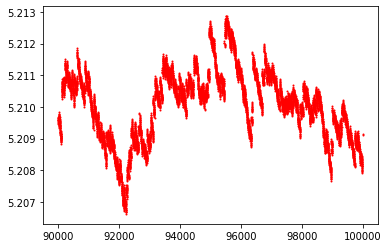

In [61]:
#  A zoom into the right side of the previous graph:
x_values, y_values = [], []
average = 0
for N in range(2, 100001):
    x_values.append(N)
    steps = 0
    n = N
    while n >= N:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N
    y_values.append(average)

print(average)
plt.scatter(x_values[-10000:], y_values[-10000:], s=1, c='red')
plt.show()

This shows the average number of steps obriting around a fixed value of roughly 5.2

Let us explore this value more.

In [62]:
#  Finding a more precise average
average = 0
for N in range(2, 10000001):
    if N%1000000 == 0:
        print("Calculating... {:.0%} complete".format(N / 10000000))
    steps = 0
    n = N
    while n >= N:
        n = collatz(n)
        steps += 1
    average = ((N - 1) * average + steps) / N

print(average)

Calculating... 10% complete
Calculating... 20% complete
Calculating... 30% complete
Calculating... 40% complete
Calculating... 50% complete
Calculating... 60% complete
Calculating... 70% complete
Calculating... 80% complete
Calculating... 90% complete
Calculating... 100% complete
5.235935099999933


From this, we can see that the average still appears to hover around a fixed value.

The average number of steps to get smaller after the first 10,000,000 is around 5.236

## Negative integers
We've seen how the collatz conjecture works for positive integers, but what might we find if we try applying it to negative integers?

Let's start with $-1$

In [63]:
n = -1
for i in range(10):
  print(n)
  n = collatz(n)

-1
-2
-1
-2
-1
-2
-1
-2
-1
-2


Starting at $-1$ leads to a cycle of -1 → -2 → -1....

This means $-2$ will also have this result.

In [64]:
#  Testing -3:
n = -3
for i in range(10):
  print(n)
  n = collatz(n)

-3
-8
-4
-2
-1
-2
-1
-2
-1
-2


Starting at $-3$ also leads to a -1, -2 cycle.


#Conjecture A
Initally, it seems that all negative integers will lead to a -1 → -2 
→ -1 cycle. For now, lets call this Conjecture A, but let's keep exploring.

In [65]:
#  Testing Conjecture A for first 100 negative integers:
for N in range(-1, -11, -1):
  n = N
  for i in range(10):
    print(N, n)
    if n == -1:
      break
    n = collatz(n)
print("First 100 negative integers successfully terminated")

-1 -1
-2 -2
-2 -1
-3 -3
-3 -8
-3 -4
-3 -2
-3 -1
-4 -4
-4 -2
-4 -1
-5 -5
-5 -14
-5 -7
-5 -20
-5 -10
-5 -5
-5 -14
-5 -7
-5 -20
-5 -10
-6 -6
-6 -3
-6 -8
-6 -4
-6 -2
-6 -1
-7 -7
-7 -20
-7 -10
-7 -5
-7 -14
-7 -7
-7 -20
-7 -10
-7 -5
-7 -14
-8 -8
-8 -4
-8 -2
-8 -1
-9 -9
-9 -26
-9 -13
-9 -38
-9 -19
-9 -56
-9 -28
-9 -14
-9 -7
-9 -20
-10 -10
-10 -5
-10 -14
-10 -7
-10 -20
-10 -10
-10 -5
-10 -14
-10 -7
-10 -20
First 100 negative integers successfully terminated


Conjecture A failed at n = -5, -7, -9, and -10, which all lead to a -5 → -14 → -7 → -20 → -10 → -5... cycle.

#Conjecture B
Naturally, our next conjecture is that:
all negative integers will lead to a -1, -2 cycle or a -14 → -7 → -20 → -10 → -5 cycle. Let's call this Conjecture B.

In [66]:
#  WARNING: VERY LARGE OUTPUT
#  Testing Conjecture B for first 100 negative integers:
for N in range(-1, -101, -1):
  steps = 0
  n = N
  while n not in [-1, -2, -5, -14, -7, -20, -10] and steps != 20:
    print(N, n)
    n = collatz(n)
    steps += 1

-3 -3
-3 -8
-3 -4
-4 -4
-6 -6
-6 -3
-6 -8
-6 -4
-8 -8
-8 -4
-9 -9
-9 -26
-9 -13
-9 -38
-9 -19
-9 -56
-9 -28
-11 -11
-11 -32
-11 -16
-11 -8
-11 -4
-12 -12
-12 -6
-12 -3
-12 -8
-12 -4
-13 -13
-13 -38
-13 -19
-13 -56
-13 -28
-15 -15
-15 -44
-15 -22
-15 -11
-15 -32
-15 -16
-15 -8
-15 -4
-16 -16
-16 -8
-16 -4
-17 -17
-17 -50
-17 -25
-17 -74
-17 -37
-17 -110
-17 -55
-17 -164
-17 -82
-17 -41
-17 -122
-17 -61
-17 -182
-17 -91
-17 -272
-17 -136
-17 -68
-17 -34
-17 -17
-17 -50
-18 -18
-18 -9
-18 -26
-18 -13
-18 -38
-18 -19
-18 -56
-18 -28
-19 -19
-19 -56
-19 -28
-21 -21
-21 -62
-21 -31
-21 -92
-21 -46
-21 -23
-21 -68
-21 -34
-21 -17
-21 -50
-21 -25
-21 -74
-21 -37
-21 -110
-21 -55
-21 -164
-21 -82
-21 -41
-21 -122
-21 -61
-22 -22
-22 -11
-22 -32
-22 -16
-22 -8
-22 -4
-23 -23
-23 -68
-23 -34
-23 -17
-23 -50
-23 -25
-23 -74
-23 -37
-23 -110
-23 -55
-23 -164
-23 -82
-23 -41
-23 -122
-23 -61
-23 -182
-23 -91
-23 -272
-23 -136
-23 -68
-24 -24
-24 -12
-24 -6
-24 -3
-24 -8
-24 -4
-25 -25
-25 -74
-25 -3

Conjecture B failed at -17 and several other values, which resulted in a shockingly long cycle of length 18. This cyle being:

-74 → -37 → -110 → -55 → -164 → -82 → -41 → -122 → -61 → -182 → -91 → -272 → -136 → -68 → -34 → -17 → -50 → -25

#Conjecture C
Since it seems that there can be many differeny loops, let's generalize with Conjecture C: all negative integers will lead to a repeating cycle.


In [67]:
#  Testing Conjecture C for first 10,000 negative integers:
for N in range(-1, -10001, -1):
  n = N
  current_chain = []
  while n not in current_chain and n <= N:
    current_chain.append(n)
    n = collatz(n)
print("First 10,000 negative integers successfully terminated")

First 10,000 negative integers successfully terminated


In [68]:
#  More testing on the terminal properties of large negative numbers:
for N in range(-10000000001, -10000000101, -1):
  n = N
  current_chain = []
  while n not in current_chain:
    current_chain.append(n)
    n = collatz(n)
  loop_len = len(current_chain) - current_chain.index(n)
  print(N, loop_len, current_chain[-loop_len:])

-10000000001 2 [-2, -1]
-10000000002 2 [-2, -1]
-10000000003 2 [-2, -1]
-10000000004 2 [-2, -1]
-10000000005 2 [-2, -1]
-10000000006 2 [-2, -1]
-10000000007 2 [-2, -1]
-10000000008 2 [-2, -1]
-10000000009 2 [-2, -1]
-10000000010 2 [-2, -1]
-10000000011 2 [-2, -1]
-10000000012 2 [-2, -1]
-10000000013 2 [-2, -1]
-10000000014 2 [-2, -1]
-10000000015 2 [-2, -1]
-10000000016 2 [-2, -1]
-10000000017 18 [-68, -34, -17, -50, -25, -74, -37, -110, -55, -164, -82, -41, -122, -61, -182, -91, -272, -136]
-10000000018 5 [-14, -7, -20, -10, -5]
-10000000019 5 [-14, -7, -20, -10, -5]
-10000000020 5 [-14, -7, -20, -10, -5]
-10000000021 2 [-2, -1]
-10000000022 2 [-2, -1]
-10000000023 18 [-68, -34, -17, -50, -25, -74, -37, -110, -55, -164, -82, -41, -122, -61, -182, -91, -272, -136]
-10000000024 2 [-2, -1]
-10000000025 5 [-14, -7, -20, -10, -5]
-10000000026 2 [-2, -1]
-10000000027 2 [-2, -1]
-10000000028 2 [-2, -1]
-10000000029 2 [-2, -1]
-10000000030 2 [-2, -1]
-10000000031 2 [-2, -1]
-10000000032 2 [-2

#Negative Integers Conclusion and Conjecture D
After testing all negative numbers up to -10,000,000,000 for their final cycle length and final cycle, it was found that all negative numbers end up in one of the following cycles:


1.   [-2, -1]
2.   [-14, -7, -20, -10, -5]
3.   [-74, -37, -110, -55, -164, -82, -41, -122, -61, -182, -91, -272, -136, -68, -34, -17, -50, -25]

With this, we have Conjecture D: All negative numbers will end up in one of the above cycles.

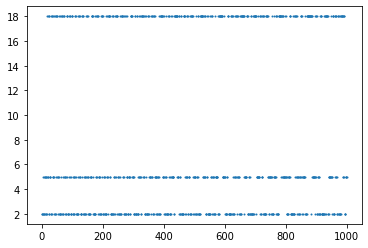

In [69]:
#  Graphing the which cycle each negative integer ends up in to look for a pattern
x_list, y_list = [], []
for N in range(-1, -1001, -1):
  x_list.append(N)
  n = N
  current_chain = []
  while n not in current_chain:
    current_chain.append(n)
    n = collatz(n)
  if -1 in current_chain:
    y_list.append(2)
  elif -5 in current_chain:
    y_list.append(5)
  elif -17 in current_chain:
    y_list.append(18)
plt.scatter([-x for x in x_list], y_list, s=1)
plt.show()

# Dropping time

Implementing the dropping time will be similar to the efficient way of 
checking if a number satisfies the Collatz Conjecture. Or in other words, we're adding counting to the algorithm.

In [70]:
def drop(n):
    if type(n) != int:
        print("Invalid input. Input should be an integer.")
        return
    steps = 0
    N = n
    while n >= N:
        if n % 2 == 0:
            n //= 2
        else:
            n = 3*n+1
        steps += 1
        #print(n, end = ", ")
    return steps

print(drop(7))

11


It might be interesting to see what the dropping time would look like as a 
function of the number, so let's make a list of inputs to outputs.

In [71]:
#We start from 2, since o(1) is undefined.
amount_of_points = 1000
inputs = list(range(2, amount_of_points))
outputs = []
for i in range(2, amount_of_points):
    outputs.append(drop(i))
print(inputs[0:10])
print(outputs[0:10])

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 6, 1, 3, 1, 11, 1, 3, 1, 8]


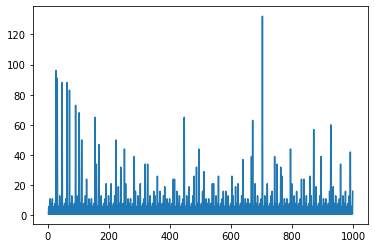

In [72]:
#Let's see how this looks visually
from matplotlib import pyplot as plt
inputs2 = inputs
outputs2 = outputs
plt.plot(inputs2, outputs2)
plt.show()

It's obvious that all even numbers will have a dropping time of 1. This graph doesn't really show much but a lot of peaks going from 1 to the dropping time of an odd valued input, so it might be interesting to see a graph without even number inputs.


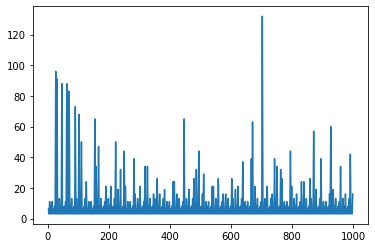

In [73]:
inputs2 = inputs[1:amount_of_points:2]
outputs2 = outputs[1:amount_of_points:2]
plt.plot(inputs2, outputs2)
plt.show()

It seems that removing even valued inputs didn't change much in the grand scheme of things. What we can see from this graph is that not many numbers have a high dropping time. There are few numbers with long dropping times as opposed to the many with very few, dropping times ranging from 1-10 or so.

---

It's not very obvious but from the looks of it, there appears to be a regularity in the spikes. Namely, around 25, 50, and 75, there are evenly space spikes. Let's see if there's any pattern going on.

In [74]:
numbers = []
for i in range(len(outputs)):
    if outputs[i] > 18:
        numbers.append(inputs[i])
for num in numbers:
    print("{} mod 8 = {}".format(num, num % 8))

27 mod 8 = 3
31 mod 8 = 7
47 mod 8 = 7
63 mod 8 = 7
71 mod 8 = 7
91 mod 8 = 3
103 mod 8 = 7
111 mod 8 = 7
127 mod 8 = 7
155 mod 8 = 3
159 mod 8 = 7
167 mod 8 = 7
191 mod 8 = 7
207 mod 8 = 7
223 mod 8 = 7
231 mod 8 = 7
239 mod 8 = 7
251 mod 8 = 3
255 mod 8 = 7
283 mod 8 = 3
303 mod 8 = 7
319 mod 8 = 7
327 mod 8 = 7
359 mod 8 = 7
383 mod 8 = 7
411 mod 8 = 3
415 mod 8 = 7
447 mod 8 = 7
463 mod 8 = 7
479 mod 8 = 7
487 mod 8 = 7
495 mod 8 = 7
511 mod 8 = 7
539 mod 8 = 3
543 mod 8 = 7
559 mod 8 = 7
603 mod 8 = 3
615 mod 8 = 7
623 mod 8 = 7
639 mod 8 = 7
667 mod 8 = 3
671 mod 8 = 7
679 mod 8 = 7
703 mod 8 = 7
719 mod 8 = 7
743 mod 8 = 7
751 mod 8 = 7
763 mod 8 = 3
767 mod 8 = 7
795 mod 8 = 3
799 mod 8 = 7
831 mod 8 = 7
839 mod 8 = 7
859 mod 8 = 3
871 mod 8 = 7
879 mod 8 = 7
895 mod 8 = 7
927 mod 8 = 7
935 mod 8 = 7
959 mod 8 = 7
991 mod 8 = 7


It looks like we have our answer. Typically, numbers with (relatively) high dropping times, number mod 8, will be either 3 or 7.

In [75]:
for num in numbers:
    print("{} mod 16 = {}".format(num, num % 16))

27 mod 16 = 11
31 mod 16 = 15
47 mod 16 = 15
63 mod 16 = 15
71 mod 16 = 7
91 mod 16 = 11
103 mod 16 = 7
111 mod 16 = 15
127 mod 16 = 15
155 mod 16 = 11
159 mod 16 = 15
167 mod 16 = 7
191 mod 16 = 15
207 mod 16 = 15
223 mod 16 = 15
231 mod 16 = 7
239 mod 16 = 15
251 mod 16 = 11
255 mod 16 = 15
283 mod 16 = 11
303 mod 16 = 15
319 mod 16 = 15
327 mod 16 = 7
359 mod 16 = 7
383 mod 16 = 15
411 mod 16 = 11
415 mod 16 = 15
447 mod 16 = 15
463 mod 16 = 15
479 mod 16 = 15
487 mod 16 = 7
495 mod 16 = 15
511 mod 16 = 15
539 mod 16 = 11
543 mod 16 = 15
559 mod 16 = 15
603 mod 16 = 11
615 mod 16 = 7
623 mod 16 = 15
639 mod 16 = 15
667 mod 16 = 11
671 mod 16 = 15
679 mod 16 = 7
703 mod 16 = 15
719 mod 16 = 15
743 mod 16 = 7
751 mod 16 = 15
763 mod 16 = 11
767 mod 16 = 15
795 mod 16 = 11
799 mod 16 = 15
831 mod 16 = 15
839 mod 16 = 7
859 mod 16 = 11
871 mod 16 = 7
879 mod 16 = 15
895 mod 16 = 15
927 mod 16 = 15
935 mod 16 = 7
959 mod 16 = 15
991 mod 16 = 15


Here we can see the results of the previous mod with more detail. Indeed the numbers mod 8 that had high dropping times were 3 and 7. Therefore it would make sense for 7 to be here as well as 15 since that would 7 % 8 = 15 % 8. It would seem that nothing much changes here for 3, instead every high drop time number mod 16 is 11. It would appear that many numbers will fall under these 3 categories.

#A Change of "Rules"
We've made some interesting discoveries in regards to both the standard Collatz Conjecture, and applying such to negative integers.

Let's see what happens if we change our algorithm to something other than 3n + 1 if odd, and n/2 when even.

#$3n -1$
First, let's see what happens if n is odd, we once again multiply by 3, but this time we'll subtract 1 rather than add 1.

In [76]:
def modified_collatz1(n):
  return [n//2, 3*n-1][n%2]

Let's see how this works for the first 100 positive integers.

In [77]:
for N in range(1, 11):
  n = N
  for i in range(10):
    print(N, n)
    n = modified_collatz1(n)
print("First 100 negative integers successfully terminated")

1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
1 1
1 2
2 2
2 1
2 2
2 1
2 2
2 1
2 2
2 1
2 2
2 1
3 3
3 8
3 4
3 2
3 1
3 2
3 1
3 2
3 1
3 2
4 4
4 2
4 1
4 2
4 1
4 2
4 1
4 2
4 1
4 2
5 5
5 14
5 7
5 20
5 10
5 5
5 14
5 7
5 20
5 10
6 6
6 3
6 8
6 4
6 2
6 1
6 2
6 1
6 2
6 1
7 7
7 20
7 10
7 5
7 14
7 7
7 20
7 10
7 5
7 14
8 8
8 4
8 2
8 1
8 2
8 1
8 2
8 1
8 2
8 1
9 9
9 26
9 13
9 38
9 19
9 56
9 28
9 14
9 7
9 20
10 10
10 5
10 14
10 7
10 20
10 10
10 5
10 14
10 7
10 20
First 100 negative integers successfully terminated


Once n = 5, we get stuck in a loop of 5 → 14 → 7 → 20 → 10, → 5...

This is very similar to when we first attempted to apply the original Collatz Conjecture to negative integers. 

That makes sense, adding 1 to a negative number, results in the same difference as subtracting 1 from a positive number.

#$3n + 2$
What if we multiply by 3 and add 2 if n is odd?

In [78]:
def modified_collatz2(n):
  return [n//2, 3*n+2][n%2]

In [79]:
#WARNING VERY LARGE NUMBERS
for N in range(1, 11):
  steps = 0
  n = N
  while n not in [1, 2, 4] and steps != 10:
    print(N, n)
    n = modified_collatz2(n)
    steps += 1

3 3
3 11
3 35
3 107
3 323
3 971
3 2915
3 8747
3 26243
3 78731
5 5
5 17
5 53
5 161
5 485
5 1457
5 4373
5 13121
5 39365
5 118097
6 6
6 3
6 11
6 35
6 107
6 323
6 971
6 2915
6 8747
6 26243
7 7
7 23
7 71
7 215
7 647
7 1943
7 5831
7 17495
7 52487
7 157463
8 8
9 9
9 29
9 89
9 269
9 809
9 2429
9 7289
9 21869
9 65609
9 196829
10 10
10 5
10 17
10 53
10 161
10 485
10 1457
10 4373
10 13121
10 39365


At only n = 3, this version of the conjecture launches our intger up towards infinity.

Thinking through it, we realize:
3 → 11 → 35 → 107 → 323 → 971 → 2915 → 8747 → 26243 →...

The last digits of each number seem to be in a cycle of 3 → 1 → 5 → 7 → 3...

Because of this, n will always be odd. Since n increases (3n + 2) when odd, and decreases when even (n//2), conjectures will always appraoch infinity unless n is able to be even.